In [1]:
#Importing 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Ankit\Documents\CareerFoundry\Achievement 4\Instacart Basket Analysis'

In [3]:
#Importing Dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 32 columns):
 #   Column                              Dtype   
---  ------                              -----   
 0   product_id                          int64   
 1   product_name                        object  
 2   aisle_id                            int64   
 3   department_id                       int64   
 4   prices                              float64 
 5   order_id                            int64   
 6   user_id                             object  
 7   eval_set                            object  
 8   order_number                        int64   
 9   order_dow                           int64   
 10  hour_of_day                         int64   
 11  days_since_prior_order              float64 
 12  add_to_cart_order                   int64   
 13  reordered                           int64   
 14  busiest_day                         object  
 15  busiest_days                    

2. Regarding the PII, the first_name and last_name columns need to be removed

In [4]:
df_merged = df_merged.drop(columns = ['First_name', 'Last_Name'])

In [17]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,Gender,State,Age,Date_joined,Dependants,Fam_status,Income,True,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central)
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central)
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central)
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central)
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central)


In [5]:
#Creating a List using if-then to add as a column
Result = []

for state in df_merged["State"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']:
        Result.append('Division 1 (New England)')
    elif state in ['New York', 'Pennsylvania', 'New Jersey']:
        Result.append('Division 2 (Middle Atlantic)')
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio']:
        Result.append('Division 3 (East North Central)')
    elif state in ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        Result.append('Division 4 (West North Central)')
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']:
        Result.append('Division 5 (South Atlantic)')
    elif state in ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']:
        Result.append('Division 6 (East South Central)')
    elif state in ['Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        Result.append('Division 7 (West South Central)')
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']:
        Result.append('Division 8 (Mountain)')
    elif state in ['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        Result.append('Division 9 (Pacific)')
    else:
        Result.append('Unknown')

In [6]:
df_merged['Region'] = Result

In [7]:
# Group the data by region and calculate the average spending
avg_spending_by_region = df_merged.groupby('Region')['prices'].mean()

In [8]:
# Create a cross tabulation of Region and spending_flag
spending_by_region = pd.crosstab(df_merged['Region'],df_merged['spending_flag'],dropna = False)

In [11]:
spending_by_region.to_clipboard()

In [9]:
spending_by_region

spending_flag,High spender,Low spender
Region,,
Division 1 (New England),77035,3714944
Division 2 (Middle Atlantic),31183,1899574
Division 3 (East North Central),71002,3076659
Division 4 (West North Central),84959,4364705
Division 5 (South Atlantic),118813,5586272
Division 6 (East South Central),45447,2475594
Division 7 (West South Central),45431,2520328
Division 8 (Mountain),95632,4986825
Division 9 (Pacific),64708,3145748


In [10]:
df_merged.loc[df_merged['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [11]:
df_merged.loc[df_merged['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [12]:
df_merged['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [13]:
#create new customer subset
df_merged2 = df_merged[df_merged['low_order_flag'] == 'High order customer']

In [14]:
#export high order customers 
df_merged2.to_pickle(r'C:\Users\Ankit\Documents\CareerFoundry\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data/high_order_customers.pkl')

In [16]:
df_merged2['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [18]:
Result2 = []

for Age in df_merged2["Age"]:
    if Age < 30:
        Result2.append('Young')
    elif Age >= 30 and Age <= 66:
        Result2.append('Adult')
    elif Age >= 66:
        Result2.append('Senior')
    else:
        Result2.append('Unknown')

In [19]:
df_merged2['Age_Profile'] = Result2

C:\Users\Ankit\AppData\Local\Temp\ipykernel_3664\380599583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2['Age_Profile'] = Result2


In [20]:
df_merged2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,State,Age,Date_joined,Dependants,Fam_status,Income,True,Region,low_order_flag,Age_Profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central),High order customer,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central),High order customer,Senior
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central),High order customer,Senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central),High order customer,Senior
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Division 4 (West North Central),High order customer,Senior


In [21]:
# Count the number of customers in each age profile
age_profile_count = df_merged2['Age_Profile'].value_counts()

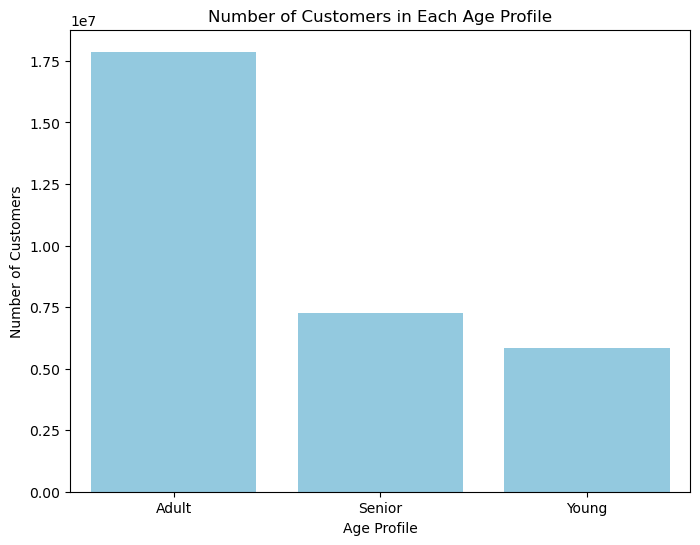

In [22]:
# Create a bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=age_profile_count.index, y=age_profile_count.values, color='skyblue')
plt.title('Number of Customers in Each Age Profile')
plt.xlabel('Age Profile')
plt.ylabel('Number of Customers')
plt.show()

In [27]:
# Group by 'user_id'
grouped_data = df_merged2.groupby('Age_Profile')

In [28]:
agg_data = grouped_data.agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})

In [29]:
agg_data

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
Age_Profile                                                                
Adult                         30.0  10.814627  0.0  99999.0  11.931579  1.0
Senior                        30.0  10.795700  0.0  99999.0  11.726278  1.0
Young                         30.0  10.815269  0.0  99999.0  12.198693  1.0

In [30]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 34 columns):
 #   Column                              Dtype   
---  ------                              -----   
 0   product_id                          int64   
 1   product_name                        object  
 2   aisle_id                            int64   
 3   department_id                       int64   
 4   prices                              float64 
 5   order_id                            int64   
 6   user_id                             object  
 7   eval_set                            object  
 8   order_number                        int64   
 9   order_dow                           int64   
 10  hour_of_day                         int64   
 11  days_since_prior_order              float64 
 12  add_to_cart_order                   int64   
 13  reordered                           int64   
 14  busiest_day                         object  
 15  busiest_days                  

In [31]:
# Create pivot table with average age, income, and dependents for each region and department
pivot = pd.pivot_table(df_merged2, values=['Age', 'Income', 'Dependants'], index=['Region', 'department_id'], aggfunc={'Age': 'mean', 'Income': 'mean', 'Dependants': 'mean'})


MemoryError: Unable to allocate 3.69 GiB for an array with shape (16, 30964564) and data type object

In [ ]:
# Create heat map
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Average'})
plt.title('Average Age, Income, and Dependents by Region and Department')
plt.xlabel('Department')
plt.ylabel('Region')
plt.tight_layout()

In [ ]:
plt.savefig('customer_profiles.png')